In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
from IPython.display import display

# Gillespies Direct Algorithm

### Defining the different events, their rates and model parameters

In [2]:
def e1(x): # births
    return x+1

def e2(x,y): # transmission
    return [x-1,y+1]

def e3(y,z): # recovery
    return [y-1,z+1]

def e4(x): # death of susceptibles
    return x-1 

def e5(y): # death of infecteds
    return y-1

def e6(z): # death of recovereds
    return z-1

B = 3 # 3 these are the values for observing transients
G = 0.5 # .5
mu = 1/50 # 1/50
# values of the model parameters were changed for different simulations



## GA Simulation

### Initializing all the variables 

In [3]:
N = 1e4
x_init = N * .85
y_init = N * .14
z_init = N * .01

# xlist = [x_init]
# ylist = [y_init]
# zlist = [z_init]
# tlist = [0]

# x2list = [x_init]
# y2list = [y_init]
# z2list = [z_init]
# t2list = [0]


# x3list = [x_init]
# y3list = [y_init]
# z3list = [z_init]
# t3list = [0]
# lists to hold data for multiple simulations


### GSSA Function

In [4]:
# i think everything here is self explanatory so no in depth comments included
def gssa( B, G, mu, N=1e4, T=500, x_init=.85, y_init=.14, z_init=.01):
    i1=i2=i3=i4=i5=i6=0
    t = 0
    x = N*x_init
    y = N*y_init
    z = N*z_init
    xlist = [x]
    ylist = [y]
    zlist = [z]
    tlist = [0]
    while t<T:
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)

        e1_rate = mu * N
        e2_rate = B*x*y/N 
        e3_rate = G * y
        e4_rate = mu * x
        e5_rate = mu * y
        e6_rate = mu * z
        e_total_rate = e1_rate+e2_rate+e3_rate+e4_rate+e5_rate+e6_rate

        dt = -1/e_total_rate * np.log(u1)

        if u2*e_total_rate < e1_rate:
            x = e1(x)
            i1+=1
        elif u2*e_total_rate < e1_rate+e2_rate:
            x,y = e2(x,y)
            i2+=1
        elif u2*e_total_rate < e1_rate+e2_rate+e3_rate:
            y,z = e3(y,z)
            i3+=1
        elif u2*e_total_rate < e1_rate+e2_rate+e3_rate+e4_rate:
            x = e4(x)
            i4+=1
        elif u2*e_total_rate < e1_rate+e2_rate+e3_rate+e4_rate+e5_rate:
            y = e5(y)
            i5+=1
        elif u2*e_total_rate < e1_rate+e2_rate+e3_rate+e4_rate+e5_rate+e6_rate:
            z = e6(z)
            i6+=1     

        t += dt   
        tlist.append(t)
        xlist.append(x)
        ylist.append(y)
        zlist.append(z)
    return [xlist, ylist, zlist, tlist]



### Plotting Function

In [5]:
def plotter(xdata, ydata, labels, no_of_curves, x_label, y_label, title1, linewidths=None, figsize=None):
    plt.style.use('ggplot')
    if linewidths is None:
        linewidths = [1 for _ in range(no_of_curves)]
    if figsize is not None:
        plt.figure(figsize=figsize)
    if len(labels) > 0:
        for i in range(no_of_curves):
            plt.plot(xdata[i], ydata[i], label = labels[i], linewidth=linewidths[i])
    else:
        for i in range(no_of_curves):
            plt.plot(xdata[i], ydata[i], linewidth=linewidths[i])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title1)
    plt.legend()
    plt.show()

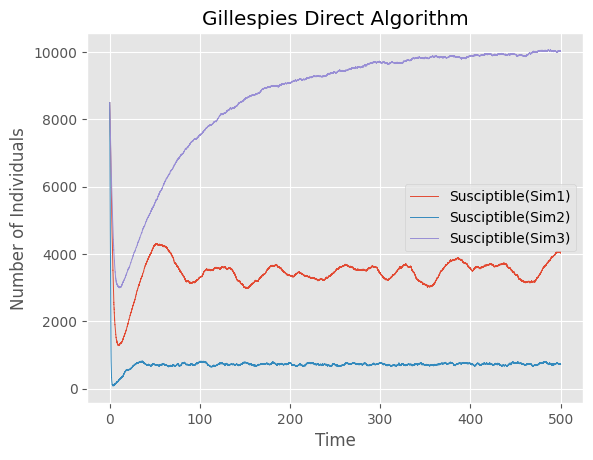

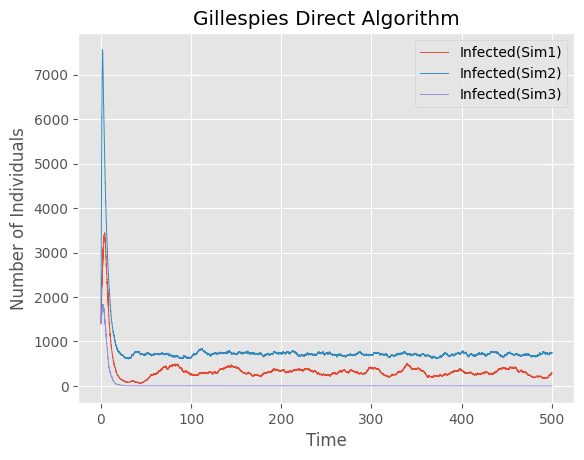

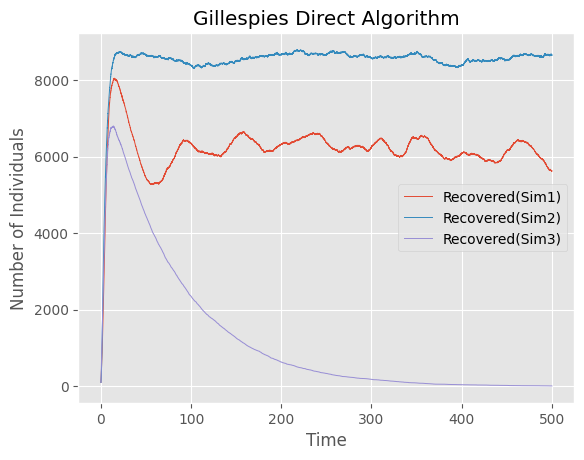

In [6]:
x1list,y1list,z1list,t1list = gssa(1, 0.33, 1/60)
x2list,y2list,z2list,t2list = gssa(3, 0.2, 1/60)
x3list,y3list,z3list,t3list = gssa(1, 0.6, 1/80)

plotter(xdata=[t1list,t2list,t3list], ydata=[x1list,x2list,x3list], 
        labels=['Susciptible(Sim1)','Susciptible(Sim2)','Susciptible(Sim3)'], no_of_curves=3, 
        x_label='Time', y_label='Number of Individuals', title1='Gillespies Direct Algorithm',
        linewidths=[0.7,0.7,0.7])

plotter(xdata=[t1list,t2list,t3list], ydata=[y1list,y2list,y3list], 
        labels=['Infected(Sim1)','Infected(Sim2)','Infected(Sim3)'], no_of_curves=3, 
        x_label='Time', y_label='Number of Individuals', title1='Gillespies Direct Algorithm',
        linewidths=[0.7,0.7,0.7])

plotter(xdata=[t1list,t2list,t3list], ydata=[z1list,z2list,z3list], 
        labels=['Recovered(Sim1)','Recovered(Sim2)','Recovered(Sim3)'], no_of_curves=3, 
        x_label='Time', y_label='Number of Individuals', title1='Gillespies Direct Algorithm',
        linewidths=[0.7,0.7,0.7])

### Variance b/w Multiple Simulations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


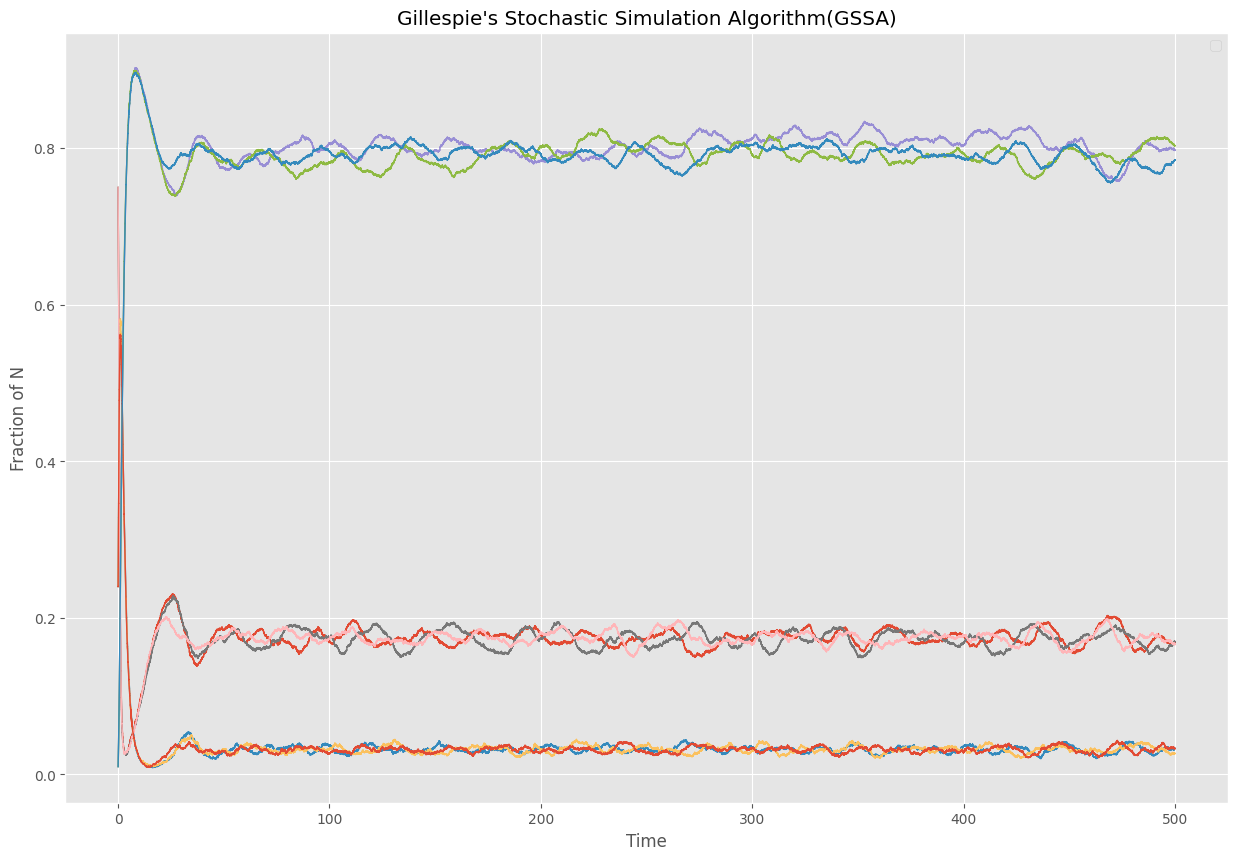

In [7]:
# parameters to showcase negative covariance clearly
# B = 1.8
# G = .4
# mu = 1/50
# N = 1e3

xlist, ylist, zlist, tlist = gssa(B,G,mu,x_init=.75,y_init=.24,N=N)
x2list, y2list, z2list, t2list = gssa(B,G,mu,x_init=.75,y_init=.24,N=N)
x3list, y3list, z3list, t3list = gssa(B,G,mu,x_init=.75,y_init=.24,N=N)


# converting the data from GSSA simulation numbers to fractions as it is just numbers right now
s_list_gssa = [temp/N for temp in xlist]
i_list_gssa = [temp/N for temp in ylist]
r_list_gssa = [temp/N for temp in zlist]

s2_list_gssa = [temp/N for temp in x2list]
i2_list_gssa = [temp/N for temp in y2list]
r2_list_gssa = [temp/N for temp in z2list]

s3_list_gssa = [temp/N for temp in x3list]
i3_list_gssa = [temp/N for temp in y3list]
r3_list_gssa = [temp/N for temp in z3list]

plotter(xdata=[tlist,tlist,tlist,t2list,t2list,t2list,t3list,t3list,t3list], ydata=[s_list_gssa,i_list_gssa,r_list_gssa,
                                                                                          s2_list_gssa,i2_list_gssa,r2_list_gssa,s3_list_gssa,i3_list_gssa,r3_list_gssa],
        labels=[], no_of_curves=9,
        x_label='Time', y_label='Fraction of N', title1="Gillespie's Stochastic Simulation Algorithm(GSSA)",
        figsize=(15,10)
)

## Deterministic SIR Model

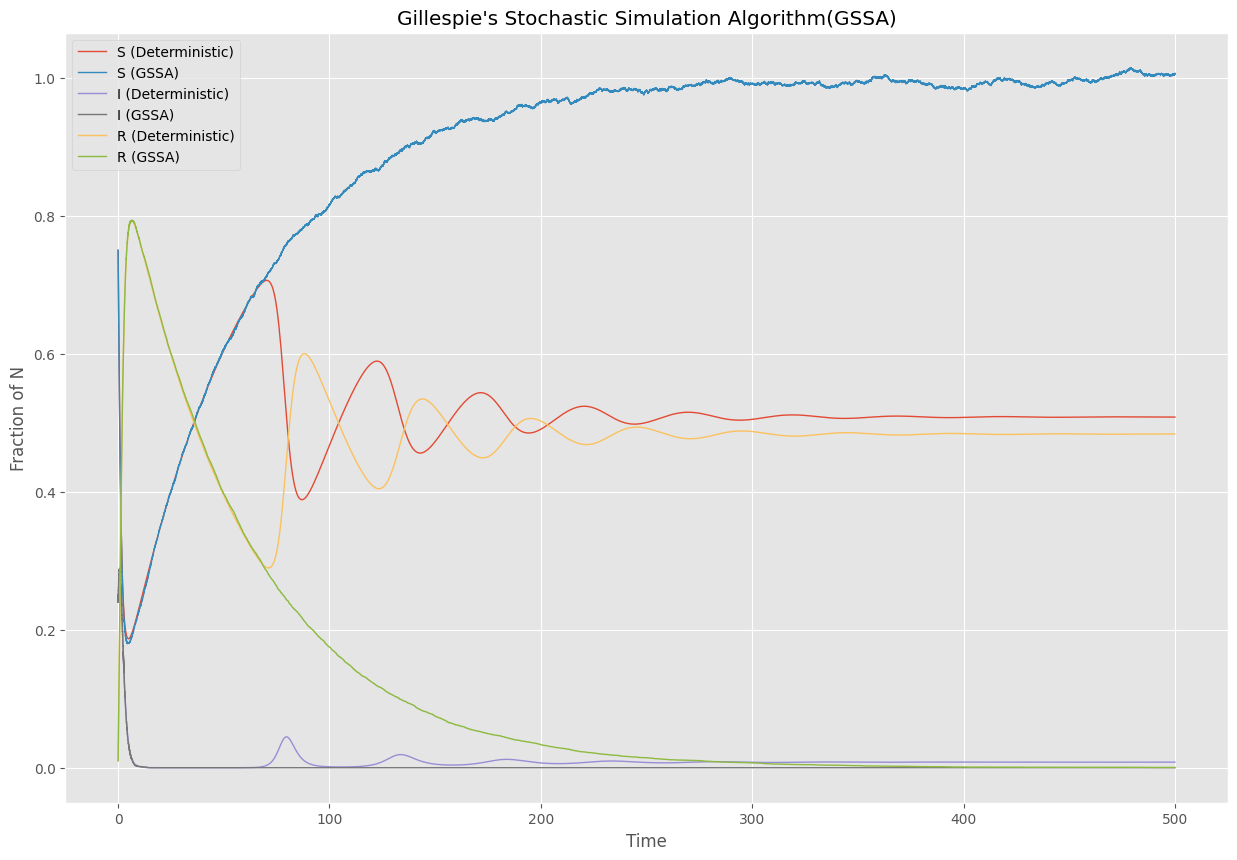

In [8]:
def sir_equations_with_demography(initial, t, B, G, mu):
    s = initial[0]
    i = initial[1]
    r = initial[2]
    dsdt = mu - B*s*i - mu*s
    didt = B*s*i - G*i - mu*i
    drdt = G*i - mu*r
    return [dsdt, didt, drdt]

# param set 1
# B = 3
# G = 0.07
# mu = 1/60
# N = 1e3

# param set 2
# B = 1.5
# G = .5
# mu = 1/50
# N = 1e4

# param set 3
B = 2
G = 1
mu = 1/60
N = 1e4

# parameters to showcase negative covariance clearly
# B = 1.8
# G = .4
# mu = 1/50
# N = 1e3

t = np.linspace(0,500,1000)

initial = [.75, .24, .01]
soln = odeint(sir_equations_with_demography, initial, t, args=(B,G,mu))
s_final_with_demography = soln.T[0]
i_final_with_demography = soln.T[1]
r_final_with_demography = soln.T[2]



xlist, ylist, zlist, tlist = gssa(B,G,mu,x_init=.75,y_init=.24,N=N)
x2list, y2list, z2list, t2list = gssa(B,G,mu,x_init=.75,y_init=.24,N=N)
x3list, y3list, z3list, t3list = gssa(B,G,mu,x_init=.75,y_init=.24,N=N)


# converting the data from GSSA simulation to fractions as it is just numbers right now
s_list_gssa = [temp/N for temp in xlist]
i_list_gssa = [temp/N for temp in ylist]
r_list_gssa = [temp/N for temp in zlist]

s2_list_gssa = [temp/N for temp in x2list]
i2_list_gssa = [temp/N for temp in y2list]
r2_list_gssa = [temp/N for temp in z2list]

s3_list_gssa = [temp/N for temp in x3list]
i3_list_gssa = [temp/N for temp in y3list]
r3_list_gssa = [temp/N for temp in z3list]

plotter(xdata=[t,tlist,t,tlist,t,tlist], ydata=[s_final_with_demography,s_list_gssa,i_final_with_demography,i_list_gssa,r_final_with_demography,r_list_gssa],
        labels=['S (Deterministic)','S (GSSA)','I (Deterministic)','I (GSSA)','R (Deterministic)','R (GSSA)'], no_of_curves=6,
        x_label='Time', y_label='Fraction of N', title1="Gillespie's Stochastic Simulation Algorithm(GSSA)",
        figsize=(15,10)
)



### Comparing mean of stochastic simulations to deterministic model

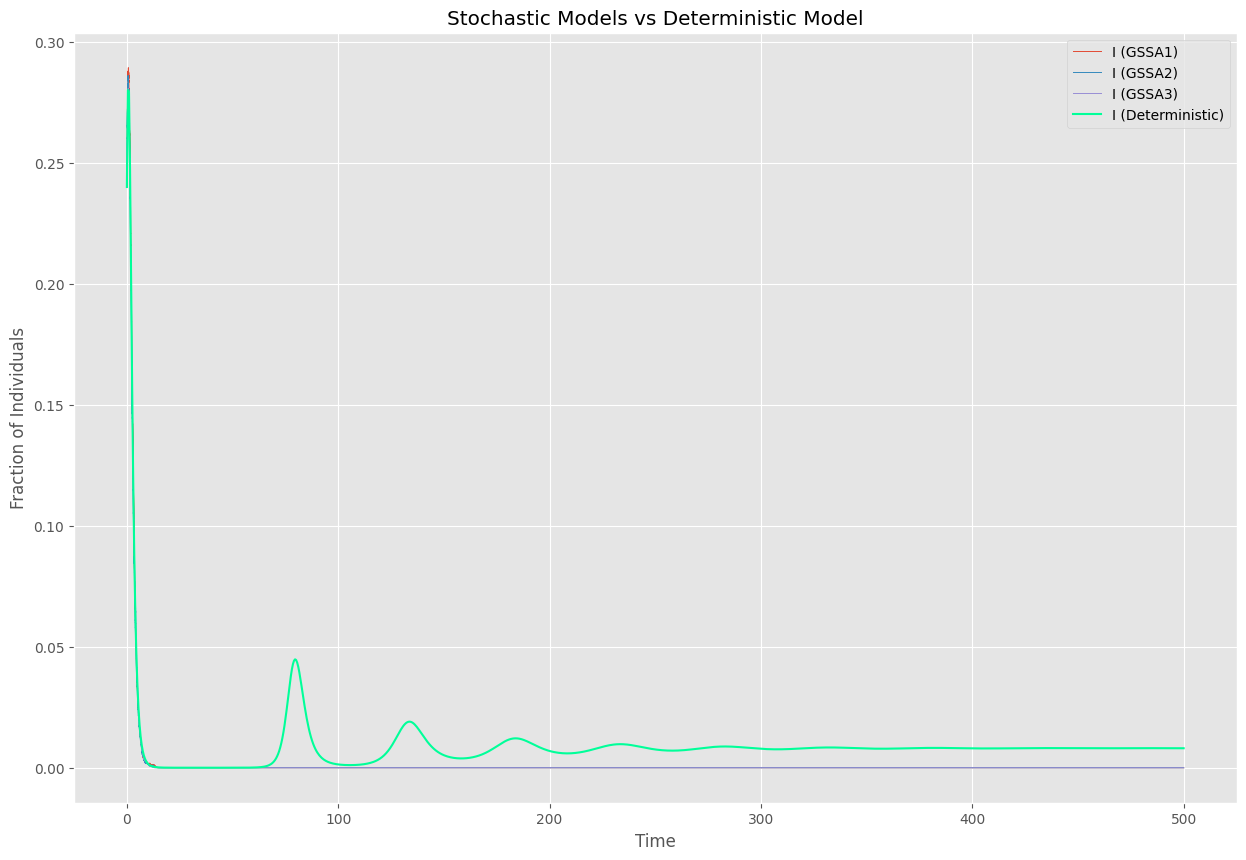

In [9]:
i2_list_gssa = [temp/N for temp in y2list]
i3_list_gssa = [temp/N for temp in y3list]

plt.figure(figsize=(15,10))
plt.plot(tlist,i_list_gssa,label = 'I (GSSA1)', linewidth=0.7)
plt.plot(t2list,i2_list_gssa,label = 'I (GSSA2)', linewidth=0.7)
plt.plot(t3list,i3_list_gssa,label = 'I (GSSA3)', linewidth=0.7)
plt.plot(t,i_final_with_demography,label = 'I (Deterministic)', color=(0, 1.0, 0.6))
plt.xlabel('Time')
plt.ylabel('Fraction of Individuals')
plt.title('Stochastic Models vs Deterministic Model')
plt.legend()
plt.show()


In [10]:
timestamps_list = t3list # list containing timestamps of respective simulation

start_index = min(range(len(timestamps_list)), key=lambda i: abs(timestamps_list[i] - 300)) # obtain index of timepoint closest to some number(eg: 100) in order to get the respective infected values
end_index = min(range(len(timestamps_list)), key=lambda i: abs(timestamps_list[i] - 305))

sum1 = 0
for i in range(start_index,end_index+1):
    sum1 += i3_list_gssa[i]

mean = sum1/(end_index-start_index)
mean
# .02  0 .028

0.0

### Extinction Events and Critical Community Size

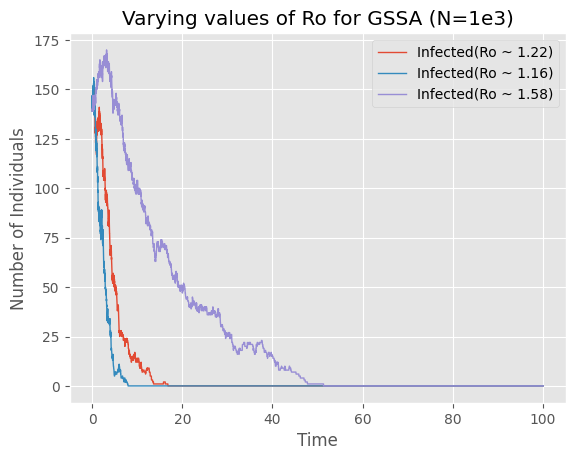

In [11]:
xlist, ylist, zlist, tlist = gssa(1, 0.8, 1/60, N=1e3, T=100)
x2list, y2list, z2list, t2list = gssa(2, 1.7, 1/60, N=1e3, T=100)
x3list, y3list, z3list, t3list = gssa(.5, 0.3, 1/60, N=1e3, T=100)


plotter(xdata=[tlist,t2list,t3list], ydata=[ylist,y2list,y3list], 
        labels=['Infected(Ro ~ 1.22)','Infected(Ro ~ 1.16)','Infected(Ro ~ 1.58)'], no_of_curves=3, 
        x_label='Time', y_label='Number of Individuals', title1='Varying values of Ro for GSSA (N=1e3)',
        )

# Spatial Models - Networks

In [140]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from pyvis.network import Network
import random

### Defining functions for different models

In [13]:
def erdos_reyni(B, G, i_init, nodes, connecting_prob, no_iterations=200):

    er = nx.erdos_renyi_graph(nodes, connecting_prob)
    model = ep.SIRModel(er)

    config = mc.Configuration()
    config.add_model_parameter('beta', B)
    config.add_model_parameter('gamma', G)
    config.add_model_parameter("fraction_infected", i_init)
    model.set_initial_status(config)

    iterations = model.iteration_bunch(no_iterations)
    trends = model.build_trends(iterations)

    plt.style.use('ggplot')
    viz = DiffusionTrend(model, trends)
    viz.plot()
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    # plt.savefig(f"Graphs/Networks/ER_node{nodes}_p{connecting_prob}_beta{B}_gamma{round(G,2)}.png")

    degrees = [er.degree(n) for n in er.nodes()]
    avg_clustering_coefficient = nx.average_clustering(er)
    betweenness = nx.betweenness_centrality(er)
    num_connected_components = nx.number_connected_components(er)
    assortativity = nx.degree_assortativity_coefficient(er)

    return [degrees, avg_clustering_coefficient, betweenness, num_connected_components, assortativity]



def barabasi_albert(B, G, i_init, nodes, m, no_iterations=200):
    ba = nx.barabasi_albert_graph(nodes, m)
    model = ep.SIRModel(ba)

    config = mc.Configuration()
    config.add_model_parameter('beta', B)
    config.add_model_parameter('gamma', G)
    config.add_model_parameter("fraction_infected", i_init)
    model.set_initial_status(config)

    iterations = model.iteration_bunch(no_iterations)
    trends = model.build_trends(iterations)

    plt.figure(figsize=(10, 6))
    viz = DiffusionTrend(model, trends)
    viz.plot()
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    # plt.savefig(f"Graphs/Networks/BA_node{nodes}_m{m}_beta{B}_gamma{round(G,2)}.png")

    degrees = [ba.degree(n) for n in ba.nodes()]
    avg_clustering_coefficient = nx.average_clustering(ba)
    betweenness = nx.betweenness_centrality(ba)
    num_connected_components = nx.number_connected_components(ba)
    assortativity = nx.degree_assortativity_coefficient(ba)

    return [degrees, avg_clustering_coefficient, betweenness, num_connected_components, assortativity]




def watts_strogatz(B, G, i_init, nodes, k, rewiring_prob, no_iterations=200):
    ws = nx.watts_strogatz_graph(nodes, k, rewiring_prob)
    model = ep.SIRModel(ws)

    config = mc.Configuration()
    config.add_model_parameter('beta', B)
    config.add_model_parameter('gamma', G)
    config.add_model_parameter("fraction_infected", i_init)
    model.set_initial_status(config)

    iterations = model.iteration_bunch(no_iterations)
    trends = model.build_trends(iterations)

    viz = DiffusionTrend(model, trends)
    viz.plot()
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    # plt.savefig(f"Graphs/Networks/WS_node{nodes}_k{k}_rewiring{rewiring_prob}_beta{B}_gamma{round(G,2)}.png")
    
    degrees = [ws.degree(n) for n in ws.nodes()]
    avg_clustering_coefficient = nx.average_clustering(ws)
    betweenness = nx.betweenness_centrality(ws)
    num_connected_components = nx.number_connected_components(ws)
    assortativity = nx.degree_assortativity_coefficient(ws)

    return [degrees, avg_clustering_coefficient, betweenness, num_connected_components, assortativity]


In [18]:
import matplotlib
matplotlib.use('Agg') # this backend does not show the figures in GUI here making the notebook more readable

# I would create a function for this, but that would involve returning all of the below variables which would end up making the code messier rather than organized

# Param set 1
B = .001
G = 1/60
i_init = .05
nodes = 1000
connecting_prob = .05 # erdos renyi network
m = 5 # barabasi albert network
k = 5 # watts strogatz network
rewiring_prob = .05
degrees_ER, avg_CC_ER1, betweenness_ER1, num_connected_components_ER, assortativity_ER = erdos_reyni(B,G,i_init,nodes,connecting_prob)
degrees_BA, avg_CC_BA1, betweenness_BA1, num_connected_components_BA, assortativity_BA = barabasi_albert(B,G,i_init,nodes,m)
degrees_WS, avg_CC_WS1, betweenness_WS1, num_connected_components_WS, assortativity_WS = watts_strogatz(B,G,i_init,nodes,k,rewiring_prob)

# Param set 2
B = .01
G = 1/60
i_init = .1
nodes = 500
connecting_prob = .1 # erdos renyi network
m = 3 # barabasi albert network
k = 3 # watts strogatz network
rewiring_prob = .1
degrees_ER, avg_CC_ER2, betweenness_ER2, num_connected_components_ER, assortativity_ER = erdos_reyni(B,G,i_init,nodes,connecting_prob)
degrees_BA, avg_CC_BA2, betweenness_BA2, num_connected_components_BA, assortativity_BA = barabasi_albert(B,G,i_init,nodes,m)
degrees_WS, avg_CC_WS2, betweenness_WS2, num_connected_components_WS, assortativity_WS = watts_strogatz(B,G,i_init,nodes,k,rewiring_prob)


# Param set 3
B = .1
G = 1/60
i_init = .2
nodes = 1000
connecting_prob = .15 # erdos renyi network
m = 3 # barabasi albert network
k = 5 # watts strogatz network
rewiring_prob = .15
degrees_ER, avg_CC_ER3, betweenness_ER3, num_connected_components_ER, assortativity_ER = erdos_reyni(B,G,i_init,nodes,connecting_prob)
degrees_BA, avg_CC_BA3, betweenness_BA3, num_connected_components_BA, assortativity_BA = barabasi_albert(B,G,i_init,nodes,m)
degrees_WS, avg_CC_WS3, betweenness_WS3, num_connected_components_WS, assortativity_WS = watts_strogatz(B,G,i_init,nodes,k,rewiring_prob)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Comparing Degree Distributions

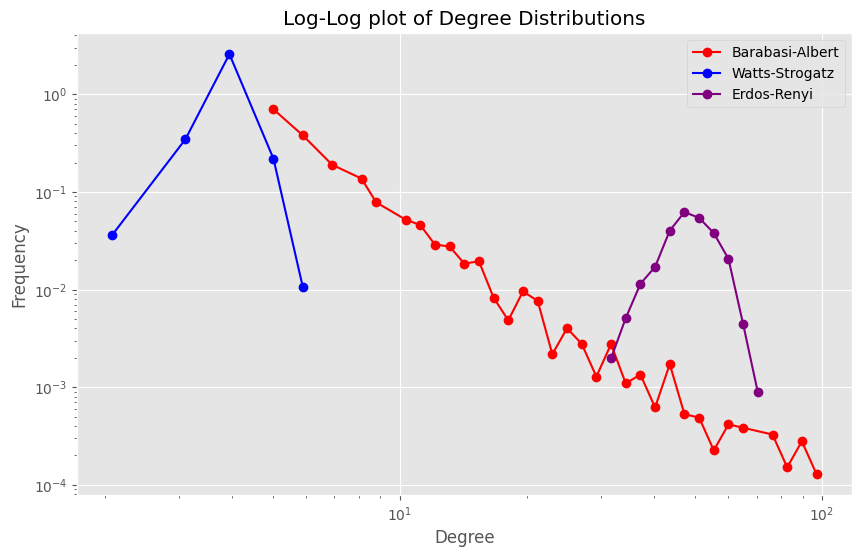

In [17]:
%matplotlib inline

def degree_distribution(degrees, bins):
    count, bin_edges = np.histogram(degrees, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, count

def plot_degree_distributions(degrees_ER, degrees_BA, degrees_WS):
    bins = np.logspace(np.log10(min(degrees_BA + degrees_WS + degrees_ER)),
                    np.log10(max(degrees_BA + degrees_WS + degrees_ER)), 50)

    bin_centers_BA, y_BA = degree_distribution(degrees_BA, bins)
    bin_centers_WS, y_WS = degree_distribution(degrees_WS, bins)
    bin_centers_ER, y_ER = degree_distribution(degrees_ER, bins)

    plt.style.use('ggplot')
    plt.figure(figsize=(10,6))

    mask_BA = y_BA > 0 # for some reason there were 0 values in the frequency list, so this removes them
    plt.loglog(np.array(bin_centers_BA)[mask_BA], np.array(y_BA)[mask_BA], 'o-', label='Barabasi-Albert', color='red')

    mask_WS = y_WS > 0
    plt.loglog(np.array(bin_centers_WS)[mask_WS], np.array(y_WS)[mask_WS], 'o-', label='Watts-Strogatz', color='blue')

    mask_ER = y_ER > 0
    plt.loglog(np.array(bin_centers_ER)[mask_ER], np.array(y_ER)[mask_ER], 'o-', label='Erdos-Renyi', color='purple')

    plt.title('Log-Log plot of Degree Distributions')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.legend()
    plt.show()

# to obtain degree distribution for a paricular parameter set, just comment out the other 2 parameter sets in the above code cell
plot_degree_distributions(degrees_ER, degrees_BA, degrees_WS) 


## Comparing Average Clustering Coefficients

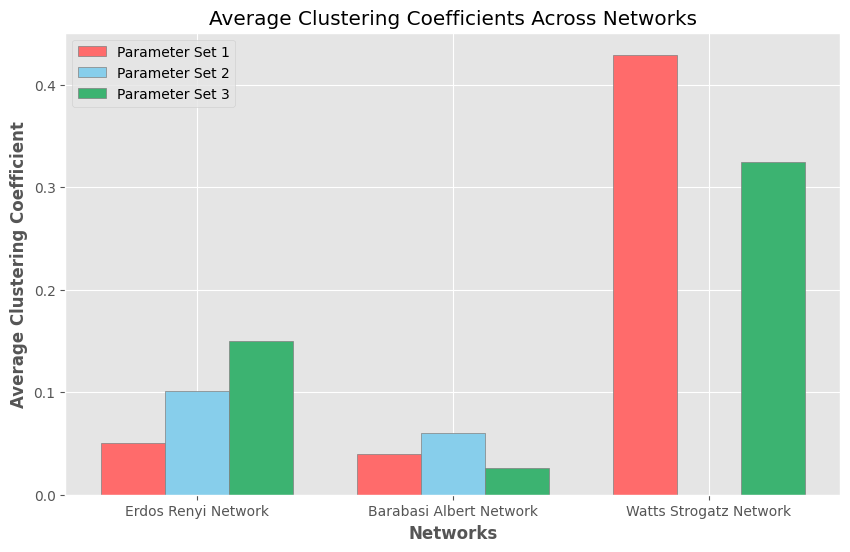

In [20]:
%matplotlib inline

coefficients = [[avg_CC_ER1,avg_CC_ER2,avg_CC_ER3], [avg_CC_BA1,avg_CC_BA2,avg_CC_BA3], [avg_CC_WS1,avg_CC_WS2,avg_CC_WS3]]
param_sets = ['Parameter Set 1', 'Parameter Set 2', 'Parameter Set 3']
networks = ['Erdos Renyi Network', 'Barabasi Albert Network', 'Watts Strogatz Network']

barWidth = 0.25
r1 = np.arange(len(coefficients))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10,6))
for idx, coeffs in enumerate(coefficients):
    plt.bar(r1[idx], coeffs[0], width=barWidth, color='#FF6B6B', edgecolor='grey', label=param_sets[0] if idx == 0 else "")
    plt.bar(r2[idx], coeffs[1], width=barWidth, color='#87CEEB', edgecolor='grey', label=param_sets[1] if idx == 0 else "")
    plt.bar(r3[idx], coeffs[2], width=barWidth, color='#3CB371', edgecolor='grey', label=param_sets[2] if idx == 0 else "")

plt.title('Average Clustering Coefficients Across Networks')
plt.xlabel('Networks', fontweight='bold')
plt.ylabel('Average Clustering Coefficient', fontweight='bold')

plt.xticks([r + barWidth for r in range(len(coefficients))], networks)

plt.legend()
plt.show()


## Comparing Betweenness

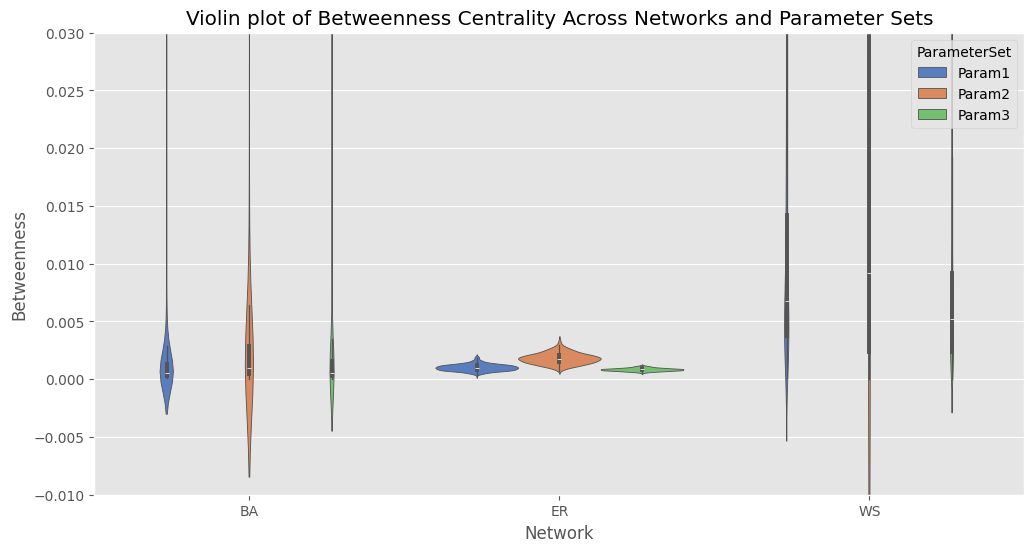

In [21]:

data = []

networks = ['BA', 'ER', 'WS']
params = [1, 2, 3]

for network in networks:
    for param in params:
        # dynamically fetch the list based on naming convention
        betweenness_list = eval(f'betweenness_{network}{param}')
        for value in betweenness_list:
            data.append([network, f'Param{param}', betweenness_list[value]])

df = pd.DataFrame(data, columns=['Network', 'ParameterSet', 'Betweenness'])

# Create the violin plot
plt.figure(figsize=(12, 6))
plt.ylim(-0.01,.03)
sns.violinplot(x='Network', y='Betweenness', hue='ParameterSet', data=df, palette="muted", split=False)
plt.title('Violin plot of Betweenness Centrality Across Networks and Parameter Sets')
plt.show()


## Dynamic Vaccination

In [307]:
def create_graph():
    df = pd.read_csv('transmission_network.csv', delimiter=';')
    df.index = df.iloc[:, 0]

    # some preprocessing
    df.index = df.index.astype(int)
    df.set_index(df.columns[0], inplace=True)
    df.columns = df.columns.astype(int)

    # convert all edges to binary as we are not interested in the duration of meetings
    df_binary = df.applymap(lambda x: 1 if x > 0 else 0)
    G = nx.from_pandas_adjacency(df_binary)

    # for visualizing
    # nt = Network(notebook=True)
    # nt.from_nx(G)
    # nt.show("tmp.html")
    return G


In [308]:

def initialize_infection(G, initial_infected=5):
    infected_nodes = random.sample(G.nodes(), initial_infected)
    for node in infected_nodes:
        G.nodes[node]['status'] = 'infected'

def dynamic_testing_strategy(G, test_budget_per_iteration):
    susceptible_nodes = []
    # searching for susceptible nodes
    for node in G.nodes():
        if 'status' not in G.nodes[node]:
            susceptible_nodes.append(node)

    sorted_nodes = sorted(susceptible_nodes, key=lambda x: G.degree(x), reverse=True)

    nodes_to_test = sorted_nodes[0:test_budget_per_iteration]
    return nodes_to_test

def random_vaccination_strategy(G, vaccination_budget_per_timestep):
    # obtain all susceptilbe nodes
    susceptible_nodes = []
    for node, data in G.nodes(data=True):
        if 'status' not in data:
            susceptible_nodes.append(node)

    nodes_to_vaccinate = random.sample(susceptible_nodes, min(vaccination_budget_per_timestep, len(susceptible_nodes)))
    return nodes_to_vaccinate


def vaccinate_nodes(G, nodes_to_vaccinate, remaining_vaccines, vaccination_budget_per_timestep):
    vaccinated_count = 0
    for node in nodes_to_vaccinate:
        # just checking to make sure node is not infected and we still have some vaccinations left
        if 'status' not in G.nodes[node] and vaccinated_count < vaccination_budget_per_timestep:
            G.nodes[node]['status'] = 'removed'
            vaccinated_count += 1
    return vaccinated_count


def run_simulation(G, test_budget_per_iteration, vaccination_budget_per_timestep, strategy, accuracy=1.0):
    total_vaccines = 200
    total_tests = 200
    new_infected = []
    
    while total_tests > 0: 
        # to ensure we do not go over the budget cap
        
        if strategy == "dynamic":
            nodes_to_test = dynamic_testing_strategy(G, min(test_budget_per_iteration, total_tests))
        elif strategy == "random":
            nodes_to_test = random_vaccination_strategy(G, vaccination_budget_per_timestep)
   
        nodes_to_vaccinate = []
        for node in nodes_to_test:
            if random.random() < accuracy:
                if 'status' not in G.nodes[node]:
                    nodes_to_vaccinate.append(node)
        current_nodes_for_vaccination = nodes_to_vaccinate[0:vaccination_budget_per_timestep]
        vaccinated = vaccinate_nodes(G, current_nodes_for_vaccination, total_vaccines, vaccination_budget_per_timestep)
        total_vaccines -= vaccinated
        total_tests -= len(nodes_to_test)
        
        # looking for neigbors of infected nodes
        for node in G.nodes():
            if 'status' in G.nodes[node]:
                if G.nodes[node]['status'] == 'infected':
                    neighbors = list(G.neighbors(node))
                    susceptible_neighbors = []
                    for n in neighbors:
                        if 'status' not in G.nodes[n]:
                            susceptible_neighbors.append(n)
                    
                    for neighbor in susceptible_neighbors:
                        new_infected.append(neighbor)
                
        # disease transmission occurs with 0.4 probability
        for node in new_infected:
            if random.random() > 0.4:
                G.nodes[node]['status'] = 'infected'
        
        new_infected = []
        
        results = evaluate_vaccination(G)
        # print(results) 
        # simulation ends if there are no more susceptibles
        if results['susceptible'] == 0:
            break

    return G

def evaluate_vaccination(G):
    infected_count = 0
    recovered_count = 0
    susceptible_count = 0
    
    for x, data in G.nodes(data=True):
        if data.get('status') == 'infected':
            infected_count += 1
        elif data.get('status') == 'removed':
            recovered_count += 1
        else:
            susceptible_count += 1
    
    result = {
        "infected": infected_count,
        "removed": recovered_count,
        "susceptible": susceptible_count
    }
    
    return result





### Initialization and Running the Simulation

In [315]:
# storing results of all simulations in these dicts
graphs_dict = {}
dynamic_results_dict = {}
random_results_dict = {}


# Dynamic vaccination campaign
vaccination_budgets = [1,3,5,10]
accuracies = [0.5,0.75,1]
for i in vaccination_budgets:
    for j in accuracies:
        G = create_graph()
        initialize_infection(G)
        graphs_dict[f'dynamic_sim_{i}_{float(j)}'] = run_simulation(G, test_budget_per_iteration=10, vaccination_budget_per_timestep=i, strategy='dynamic', accuracy=j)
        dynamic_results_dict[f'dynamic_sim_{i}_{float(j)}'] = None
for key in graphs_dict:
    graph = graphs_dict[key]
    results = evaluate_vaccination(graph)
    dynamic_results_dict[key] = results


# Random vaccinations
for i in vaccination_budgets:
    for j in accuracies:
        G = create_graph()
        initialize_infection(G)
        graphs_dict[f'random_sim_{i}_{float(j)}'] = run_simulation(G, test_budget_per_iteration=10, vaccination_budget_per_timestep=i, strategy='random', accuracy=j)
        random_results_dict[f'random_sim_{i}_{float(j)}'] = None
for key in graphs_dict:
    graph = graphs_dict[key]
    results = evaluate_vaccination(graph)
    random_results_dict[key] = results



# dynamic_results_dict, random_results_dict


### Heatmap Comparing the different Strategies

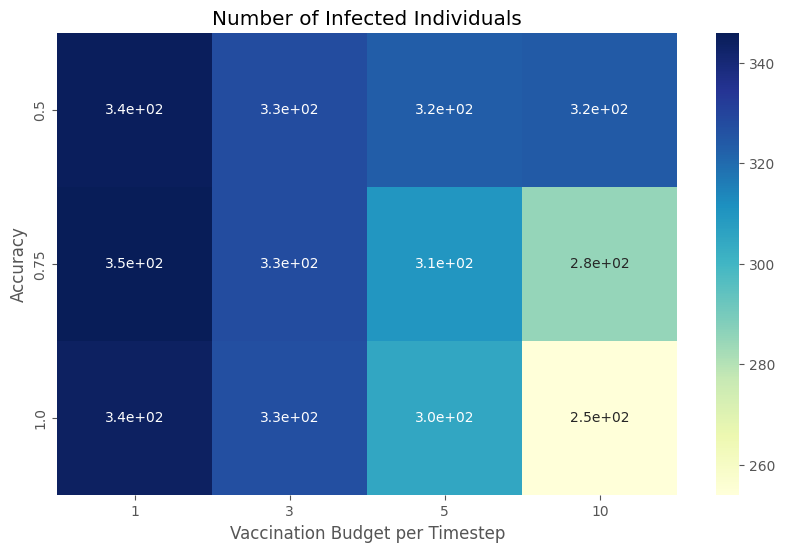

In [318]:
results_dict = dynamic_results_dict

budgets = [int(key.split('_')[2]) for key in results_dict.keys()]
accuracies = [float(key.split('_')[3]) for key in results_dict.keys()]
infected_counts = [value['infected'] for value in results_dict.values()]
removed_counts = [value['removed'] for value in results_dict.values()]

# initialzing infected matrix
infected_matrix = [[0] * len(set(budgets)) for _ in range(len(set(accuracies)))]

for i, accuracy in enumerate(sorted(set(accuracies))):
    for j, budget in enumerate(sorted(set(budgets))):
        key = f'dynamic_sim_{budget}_{accuracy}'
        infected_matrix[i][j] = results_dict[key]['infected']

plt.figure(figsize=(10, 6))
sns.heatmap(infected_matrix, annot=True, cmap='YlGnBu', xticklabels=sorted(set(budgets)), yticklabels=sorted(set(accuracies)))
plt.title('Number of Infected Individuals')
plt.xlabel('Vaccination Budget per Timestep')
plt.ylabel('Accuracy')
plt.show()


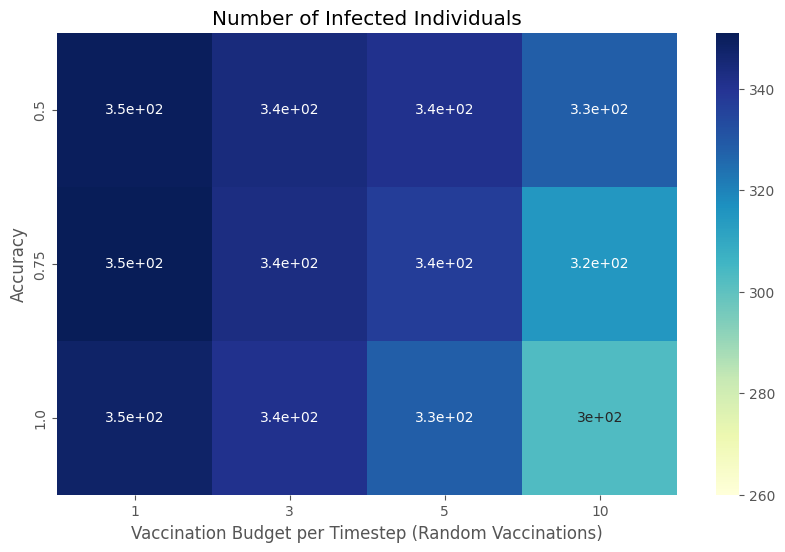

In [322]:
results_dict = random_results_dict

budgets = [int(key.split('_')[2]) for key in results_dict.keys()]
accuracies = [float(key.split('_')[3]) for key in results_dict.keys()]
infected_counts = [value['infected'] for value in results_dict.values()]
removed_counts = [value['removed'] for value in results_dict.values()]

# initialzing infected matrix
infected_matrix = [[0] * len(set(budgets)) for _ in range(len(set(accuracies)))]

for i, accuracy in enumerate(sorted(set(accuracies))):
    for j, budget in enumerate(sorted(set(budgets))):
        key = f'random_sim_{budget}_{accuracy}'
        infected_matrix[i][j] = results_dict[key]['infected']

plt.figure(figsize=(10, 6))
sns.heatmap(infected_matrix, annot=True, cmap='YlGnBu', vmin=260, xticklabels=sorted(set(budgets)), yticklabels=sorted(set(accuracies)))
plt.title('Number of Infected Individuals')
plt.xlabel('Vaccination Budget per Timestep (Random Vaccinations)')
plt.ylabel('Accuracy')
plt.show()
